In [3]:
import pandas as pd
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import glob

In [2]:
def rank_amplicon(s):
    """order the amplicon names to remove multi-mapped reads
    """
    if "wt_cut" in s:
        return 0
    if "wt1_cut" in s:
        return 0
    if "wt2_cut" in s:
        return 0
    if "1a_1a_cut" in s:
        return 1
    if "1b_1b_cut" in s:
        return 1
    if "large_deletion_cut" in s:
        return 1
    if "large_inversion_cut" in s:
        return 1
    if "1a_2a_cut" in s:
        return 1
    if "1a_2b_cut" in s:
        return 1
    if "2a_1b_cut" in s:
        return 1    
    if "2b_1b_cut" in s:
        return 1    
    return 2
def get_category(r):
    if "wt" in r.prefix:
        if r.overlap>0:
            return "indel(WT_amplicon)"
        return "WT_amplicon"
    return r.prefix
def get_intersection(region1_begin, region1_end, region2_begin, region2_end):
    list1 = range(int(region1_begin) + 1, int(region1_end) + 1)
    list2 = range(int(region2_begin) + 1, int(region2_end) + 1)
    return len(set(list1).intersection(list2))
def read_file(label):
    files = glob.glob("{0}/*/*{0}*amplicon_mapping.tsv".format(label))
    df = pd.concat([pd.read_csv(f,sep="\t") for f in files])
    df['amplicon_order'] = df.prefix.apply(rank_amplicon)
    df = df.sort_values(['AS',"amplicon_order"],ascending=[False,True])
    df = df.drop_duplicates("read_name")
    df = df.drop_duplicates("UMI")
    
    df['position_end'] = df.position + np.abs(df.indel)
    df = df.reset_index()
    df['overlap'] = df.apply(lambda r:get_intersection(r.position,r.position_end,r.region_start,r.region_end),axis=1)
    df['category'] = df.apply(get_category,axis=1)
    df=pd.DataFrame(df.category.value_counts()).reset_index()
    df.columns = ['amplicon','#collapsed_read_count']
    df['frequency'] = df['#collapsed_read_count']/df['#collapsed_read_count'].sum()
    df['label'] = label
    return df
files = glob.glob("*/*/*amplicon_mapping.tsv")
files
lables = [x.split("/")[0] for x in files]
lables = list(set(lables))
lables
df = pd.concat([read_file(f) for f in lables])
df


,amplicon,#collapsed_read_count,frequency,sample
0,1a_2b_chr11_5254896_-_chr1_119360189_+_cut1,11,0.000212,N706_N502
1,2b_1b_chr11_5254896_-_chr1_119360189_+_cut1,25,0.000481,N706_N502
2,1a_2a_chr11_5254896_-_chr1_119360189_+_cut1,40,0.000769,N706_N502
3,large_inversion_cut1,50,0.000961,N706_N502
4,2b_2b_cut1,60,0.001154,N706_N502


In [9]:
sample = pd.read_csv("sample_info.csv")
pd.set_option('display.max_columns', None)

sample.index = sample['index_I1']+"_"+sample['index_I2']
sample.head()

,NGS_req-ID,name,Sample,description,Control sample (Y/N),Notes,Dilution,Cell name_type,I7_Index_ID,index_I1,barcode_I1,I5_Index_ID,index_I2,barcode_I2,primer,genome,chr,start,end,strand,guide_1,sequence_guide_1,genome_guide_1,chr_guide_1,start_guide_1,end_guide_1,strand_guide_1,guide_2,sequence_guide_2,genome_guide_2,chr_guide_2,start_guide_2,end_guide_2,strand_guide_2,guide_3,sequence_guide_3,genome_guide_3,chr_guide_3,start_guide_3,end_guide_3,strand_guide_3,Donor (single strand; double strand),plamid_name,plasmid_sequence,genomic_background
N701_N501,VK2138,VK2138,VK2138,PER2_oML129_control_d5,Y,NaN,NaN,CD34,P7_N701_SBS12,N701,ATTCCGCT,i5_N501_UMI_Tn5-A,N501,TAGATCGC,oML129,hg38,chr11,5254880,5254899,+,g34_1,CTTGTCAAGGCTATTGGTCAAGG,hg38,chr11,5249956,5249975,+,g34_2,CTTGTCAAGGCTATTGGTCAAGG,hg38,chr11,5254880,5254899,+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N702_N502,VK2139,VK2139,VK2139,PER2_oML129_edit_d5,N,NaN,NaN,CD34,P7_N702_SBS12,N702,GCATGATC,i5_N502_UMI_Tn5-A,N502,CTCTCTAT,oML129,hg38,chr11,5254880,5254899,+,g34_1,CTTGTCAAGGCTATTGGTCAAGG,hg38,chr11,5249956,5249975,+,g34_2,CTTGTCAAGGCTATTGGTCAAGG,hg38,chr11,5254880,5254899,+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N703_N503,VK2140,VK2140,VK2140,PER3_oML129_control_d5,Y,NaN,NaN,CD34,P7_N703_SBS12,N703,TCCGTCTT,i5_N503_UMI_Tn5-A,N503,TATCCTCT,oML129,hg38,chr11,5254880,5254899,+,g34_1,CTTGTCAAGGCTATTGGTCAAGG,hg38,chr11,5249956,5249975,+,g34_2,CTTGTCAAGGCTATTGGTCAAGG,hg38,chr11,5254880,5254899,+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N704_N504,VK2141,VK2141,VK2141,PER3_oML129_edit_d5,N,NaN,NaN,CD34,P7_N704_SBS12,N704,AGGACTCG,i5_N504_UMI_Tn5-A,N504,AGAGTAGA,oML129,hg38,chr11,5254880,5254899,+,g34_1,CTTGTCAAGGCTATTGGTCAAGG,hg38,chr11,5249956,5249975,+,g34_2,CTTGTCAAGGCTATTGGTCAAGG,hg38,chr11,5254880,5254899,+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N705_N505,VK2142,VK2142,VK2142,PER5_oML129_control_d5,Y,NaN,NaN,CD34,P7_N705_SBS12,N705,CCTGAGGA,i5_N505_UMI_Tn5-A,N505,GTAAGGAG,oML129,hg38,chr11,5254880,5254899,+,g34_1,CTTGTCAAGGCTATTGGTCAAGG,hg38,chr11,5249956,5249975,+,g34_2,CTTGTCAAGGCTATTGGTCAAGG,hg38,chr11,5254880,5254899,+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
sample[['description','chr_guide_1','start_guide_1','chr_guide_2','start_guide_2']]

,description,chr_guide_1,start_guide_1,chr_guide_2,start_guide_2
N701_N501,PER2_oML129_control_d5,chr11,5249956,chr11,5254880
N702_N502,PER2_oML129_edit_d5,chr11,5249956,chr11,5254880
N703_N503,PER3_oML129_control_d5,chr11,5249956,chr11,5254880
N704_N504,PER3_oML129_edit_d5,chr11,5249956,chr11,5254880
N705_N505,PER5_oML129_control_d5,chr11,5249956,chr11,5254880
N706_N506,PER5_oML129_edit_d5,chr11,5249956,chr11,5254880
N707_N507,PER2_oML130_control_d5,chr11,5249956,chr11,5254880
N710_N508,PER2_oML130_edit_d5,chr11,5249956,chr11,5254880
N711_N501,PER3_oML130_control_d5,chr11,5249956,chr11,5254880
N712_N502,PER3_oML130_edit_d5,chr11,5249956,chr11,5254880


In [7]:
tmp = sample.description.to_dict()
df['description'] = [tmp[x] for x in df['sample']]


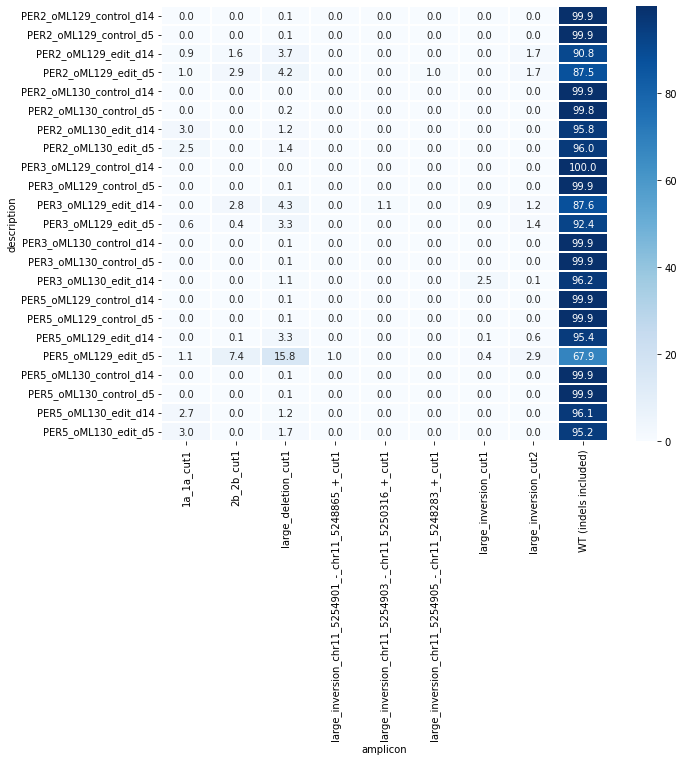

In [12]:
df5 = df.pivot(index="description",columns = ['amplicon'],values="frequency").fillna(0)
df6 = df5.copy()
df7=df6[df6.columns[df6.max()>=0.01]]*100
plt.figure(figsize=(10,8))
columns_order = df7.mean().sort_values(ascending=False).index.tolist()
sns.heatmap(df7[columns_order],annot=True,cmap="Blues",linewidth=0.1,fmt=".1f")
plt.savefig("UDITAS_amplicon_read_percent_heatmap.v2.pdf",bbox_inches='tight')


In [ ]:
out="UMI_collapse_junction_read.merged.v2.csv"
df7[columns_order].to_csv(out)

# create circos plot for each sample

In [18]:
list(df.amplicon.unique())

['1a_2b_chr11_5254896_-_chr1_119360189_+_cut1',
 '2b_1b_chr11_5254896_-_chr1_119360189_+_cut1',
 '1a_2a_chr11_5254896_-_chr1_119360189_+_cut1',
 'large_inversion_cut1',
 '2b_2b_cut1',
 '2a_1b_chr11_5254896_-_chr1_119360189_+_cut1',
 'large_inversion_cut2',
 'large_deletion_cut1',
 'wt_cut1',
 'wt_cut2',
 '1a_1a_cut1',
 '1a_2a_chr11_5254898_-_chrX_129734602_-_cut1',
 '1a_2b_chr11_5254896_-_chr6_170654479_+_cut1',
 '1a_2b_chr11_5254898_-_chrX_129734602_-_cut1',
 '1a_2b_chr11_5254896_-_chr6_91982_-_cut1',
 '2b_1b_chr11_5254896_-_chr6_170654479_+_cut1',
 '2a_1b_chr11_5254896_-_chr6_91982_-_cut1',
 '1a_2a_chr11_5254896_-_chr6_170654479_+_cut1',
 '2a_1b_chr11_5254898_-_chrX_129734602_-_cut1',
 '2b_1b_chr11_5254896_-_chr6_91982_-_cut1',
 '2b_1b_chr11_5254898_-_chrX_129734602_-_cut1',
 '2a_1b_chr11_5254896_-_chr6_170654479_+_cut1',
 'large_deletion_chr11_5254903_-_chr11_5250316_+_cut1',
 'large_deletion_chr11_5254898_-_chr11_5249943_+_cut1',
 'large_inversion_chr11_5254898_-_chr11_5249943_+_cu

In [19]:
def get_circos_obj():
    import pycircos
    import matplotlib.pyplot as plt
    Garc    = pycircos.Garc
    Gcircle = pycircos.Gcircle
    circle = Gcircle(figsize=(8,8)) 
    with open("/home/yli11/Data/Human/hg38/annotations/hg38.circos.size") as f:
        for line in f:
            line   = line.rstrip().split("\t") 
            name   = line[0]
            if len(name)<=1:
                continue
            if name =="chrM":
                continue
            length = int(line[-1]) 
            # print (name,length)
            arc    = Garc(arc_id=name, size=length, interspace=2, raxis_range=(935,985), labelposition=80, label_visible=True)
            circle.add_garc(arc) 
    circle.set_garcs(0,360) 
    for arc_id in circle.garc_dict:
        circle.tickplot(arc_id, raxis_range=(985,1000), tickinterval=20000000, ticklabels=None) 
    return circle

In [25]:
df.description.tolist()

['PER5_oML129_edit_d14',
 'PER5_oML129_edit_d14',
 'PER5_oML129_edit_d14',
 'PER5_oML129_edit_d14',
 'PER5_oML129_edit_d14',
 'PER5_oML129_edit_d14',
 'PER5_oML129_edit_d14',
 'PER5_oML129_edit_d14',
 'PER5_oML129_edit_d14',
 'PER5_oML129_edit_d14',
 'PER2_oML130_control_d14',
 'PER2_oML130_control_d14',
 'PER2_oML130_control_d14',
 'PER2_oML130_control_d14',
 'PER2_oML129_control_d5',
 'PER2_oML129_control_d5',
 'PER2_oML129_control_d5',
 'PER2_oML129_control_d5',
 'PER2_oML129_control_d5',
 'PER5_oML130_control_d5',
 'PER5_oML130_control_d5',
 'PER5_oML130_control_d5',
 'PER3_oML129_edit_d14',
 'PER3_oML129_edit_d14',
 'PER3_oML129_edit_d14',
 'PER3_oML129_edit_d14',
 'PER3_oML129_edit_d14',
 'PER3_oML129_edit_d14',
 'PER3_oML129_edit_d14',
 'PER3_oML129_edit_d14',
 'PER3_oML129_edit_d14',
 'PER3_oML129_edit_d14',
 'PER3_oML129_edit_d14',
 'PER3_oML129_edit_d14',
 'PER3_oML129_edit_d14',
 'PER3_oML129_edit_d14',
 'PER3_oML129_edit_d14',
 'PER3_oML129_edit_d14',
 'PER3_oML129_edit_d14

In [ ]:
for i,r in sample.iterrows():
    sample_name = r['description']
    chr_guide_1 = r['chr_guide_1']
    start_guide_1 = r['start_guide_1']
    end_guide_1 = r['end_guide_1']
    chr_guide_2 = r['chr_guide_2']
    start_guide_2 = r['start_guide_2']
    end_guide_2 = r['end_guide_2']
    columns = df7.columns.tolist()
    circle=get_circos_obj() 
    if not sample_name in df7.index:
        continue
    for c in columns:
        if df7.at[sample_name,c]>=1:
            c_items = c.split("_")
            if len(c_items)==3: # WT (indels included) won't be drawn
                if "1a_1a" in c:
                    source = (chr_guide_1, start_guide_1, end_guide_1, 1000)
                    destination = (chr_guide_1, start_guide_1, end_guide_1, 1000)
                    circle.chord_plot(source, destination,linewidth=6, edgecolor="red")   
                elif "2b_2b" in c:
                    source = (chr_guide_2, start_guide_2, end_guide_2, 1000)
                    destination = (chr_guide_2, start_guide_2, end_guide_2, 1000)
                    circle.chord_plot(source, destination,linewidth=6, edgecolor="red")    
                else:
                    source = (chr_guide_1, start_guide_1, end_guide_1, 1000)
                    destination = (chr_guide_2, start_guide_2, end_guide_2, 1000)
                    circle.chord_plot(source, destination,linewidth=6, edgecolor="red")    
            if len(c_items)==9: # WT (indels included) won't be drawn
                chr1=c_items[2]
                start1=int(c_items[3])
                end1=start1+1
                chr2=c_items[5]
                start2=int(c_items[6])
                end2=start2+1
                source = (chr1, start1, end1, 1000)
                destination = (chr2, start2, end2, 1000)
                circle.chord_plot(source, destination,linewidth=6, edgecolor="blue")    
    circle.figure.savefig(f"{sample_name}_UDITAS_circos.pdf",bbox_inches="tight")